# Goals of the notebook:
    
* Preprocess the datasets we have collected before to be ready for Modeling phase
* Explore the data insights and other features that might be relevant for the classification task



In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import re
import scipy.stats as stats
import regex as re
import time


pd.set_option('display.max_columns', None)
from matplotlib_venn import venn2
from nltk.tokenize import sent_tokenize, word_tokenize, RegexpTokenizer
from nltk.stem import WordNetLemmatizer
from nltk.stem.porter import PorterStemmer
from nltk import FreqDist
from nltk.corpus import stopwords 
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from sklearn.feature_extraction.text import CountVectorizer, ENGLISH_STOP_WORDS

In [2]:
import nltk
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\kelvin.liew\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\kelvin.liew\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

## Read the data

In [5]:
makeup_df = pd.read_csv('makeup.csv')
travel_df = pd.read_csv('travel.csv')

In [6]:
# check a sample of both datasets
makeup_df.sample(5)

,Unnamed: 0,all_awardings,allow_live_comments,author,author_flair_css_class,author_flair_richtext,author_flair_text,author_flair_type,author_fullname,author_is_blocked,author_patreon_flair,author_premium,awarders,can_mod_post,contest_mode,created_utc,domain,full_link,gildings,id,is_created_from_ads_ui,is_crosspostable,is_meta,is_original_content,is_reddit_media_domain,is_robot_indexable,is_self,is_video,link_flair_background_color,link_flair_richtext,link_flair_text_color,link_flair_type,locked,media_only,no_follow,num_comments,num_crossposts,over_18,parent_whitelist_status,permalink,pinned,pwls,retrieved_on,score,selftext,send_replies,spoiler,stickied,subreddit,subreddit_id,subreddit_subscribers,subreddit_type,suggested_sort,thumbnail,title,total_awards_received,treatment_tags,upvote_ratio,url,whitelist_status,wls,post_hint,preview,link_flair_template_id,link_flair_text,removed_by_category,author_cakeday,crosspost_parent,crosspost_parent_list,url_overridden_by_dest,thumbnail_height,thumbnail_width,edited
422,422,[],False,wednesdayattoms,NaN,[],NaN,text,t2_buu4ywzu,False,False,False,[],False,False,1650001854,self.Makeup,https://www.reddit.com/r/Makeup/comments/u417b...,{},u417bv,False,True,False,False,False,True,True,False,NaN,[],dark,text,False,False,True,0,0,False,all_ads,/r/Makeup/comments/u417bv/everyday_primer_that...,False,6,1650001865,1,Hey all! I've been using Smashbox's Vitamin Gl...,True,False,False,Makeup,t5_2qrwc,1008340,public,top,self,Everyday primer that isn't worth a fortune?,0,[],1.0,https://www.reddit.com/r/Makeup/comments/u417b...,all_ads,6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1320,1320,[],False,willowdrifter,NaN,[],NaN,text,t2_2rfhez5n,False,False,False,[],False,False,1647889794,self.Makeup,https://www.reddit.com/r/Makeup/comments/tjjf7...,{},tjjf71,False,True,False,False,False,True,True,False,NaN,"[{'e': 'text', 't': '[Makeup Help]'}]",dark,richtext,False,False,True,0,0,False,all_ads,/r/Makeup/comments/tjjf71/concealer_that_compl...,False,6,1647889805,1,"I have always had dark circles, whether I get ...",True,False,False,Makeup,t5_2qrwc,916420,public,top,self,Concealer that completely hides dark circles?,0,[],1.0,https://www.reddit.com/r/Makeup/comments/tjjf7...,all_ads,6,NaN,NaN,0eb429a6-3b52-11e3-ad3c-12313d184137,[Makeup Help],NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
86,86,[],False,dumbbratbaby,NaN,[],NaN,text,t2_apzcibrx,False,False,False,[],False,False,1650732254,self.Makeup,https://www.reddit.com/r/Makeup/comments/ua9hr...,{},ua9hro,False,True,False,False,False,True,True,False,NaN,[],dark,text,False,False,False,0,0,False,all_ads,/r/Makeup/comments/ua9hro/concealer_recommenda...,False,6,1650732264,1,please help me out here lol. i’ve tried using ...,True,False,False,Makeup,t5_2qrwc,1035546,public,top,self,concealer recommendations that won’t make my u...,0,[],1.0,https://www.reddit.com/r/Makeup/comments/ua9hr...,all_ads,6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
268,268,[],False,americancoconuts,NaN,[],NaN,text,t2_48keklt9,False,False,False,[],False,False,1650324550,self.Makeup,https://www.reddit.com/r/Makeup/comments/u6qpq...,{},u6qpq0,False,True,False,False,False,True,True,False,NaN,[],dark,text,False,False,True,0,0,False,all_ads,/r/Makeup/comments/u6qpq0/are_buildable_covera...,False,6,1650324560,1,NaN,True,False,False,Makeup,t5_2qrwc,1020488,public,top,self,"Are “buildable” coverage foundations, BB/CC cr...",0,[],1.0,https://www.reddit.com/r/Makeup/comments/u6qpq...,all_ads,6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
105,105,[],False,11willowl,NaN,[],NaN,text,t2_gagmyj72,False,False,False,[],False,False,1650682617,self.Makeup,https://www.reddit.com/r/Makeup/comments/u9voo...,{},u9vooh,False,True,False,False,False,True,True,False,NaN,[],dark,text,False,False,False,0,0,False,all_ads,/r/Makeup/comments/u9vooh/in_need_of_recommend...,False,6,1650682627,1,I have very dry skin and need a good medium co...,True,False,False,Makeup,t5_2qrwc,1033866,public,top,self,In need of recommendations f

In [7]:
travel_df.sample(5)

,Unnamed: 0,all_awardings,allow_live_comments,author,author_flair_css_class,author_flair_richtext,author_flair_text,author_flair_type,author_fullname,author_is_blocked,author_patreon_flair,author_premium,awarders,can_mod_post,contest_mode,created_utc,domain,full_link,gildings,id,is_created_from_ads_ui,is_crosspostable,is_meta,is_original_content,is_reddit_media_domain,is_robot_indexable,is_self,is_video,link_flair_background_color,link_flair_richtext,link_flair_text_color,link_flair_type,locked,media_only,no_follow,num_comments,num_crossposts,over_18,parent_whitelist_status,permalink,pinned,pwls,removed_by_category,retrieved_on,score,selftext,send_replies,spoiler,stickied,subreddit,subreddit_id,subreddit_subscribers,subreddit_type,thumbnail,title,total_awards_received,treatment_tags,upvote_ratio,url,whitelist_status,wls,link_flair_css_class,link_flair_template_id,link_flair_text,post_hint,preview,thumbnail_height,thumbnail_width,url_overridden_by_dest,is_gallery,media,media_embed,secure_media,secure_media_embed,author_flair_background_color,author_flair_text_color,author_flair_template_id,call_to_action,category,crosspost_parent,crosspost_parent_list,banned_by,media_metadata,author_cakeday,gallery_data,edited
1073,1073,[],False,largelylegit,NaN,[],NaN,text,t2_5g2yf,False,False,False,[],False,False,1650530839,self.travel,https://www.reddit.com/r/travel/comments/u8izz...,{},u8izz8,False,True,False,False,False,True,True,False,NaN,[],dark,text,False,False,True,2,0,False,all_ads,/r/travel/comments/u8izz8/17_nights_in_malta_i...,False,6,NaN,1650530850,1,I have 2 and a half weeks this September for m...,True,False,False,travel,t5_2qh41,6374181,public,self,"17 nights in Malta, Italy and Croatia. Your re...",0,[],1.00,https://www.reddit.com/r/travel/comments/u8izz...,all_ads,6,question,NaN,Question,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
43,43,[],False,Pitiful-Ad-8728,NaN,[],NaN,text,t2_mddinze2,False,False,False,[],False,False,1650895233,self.travel,https://www.reddit.com/r/travel/comments/ublu6...,{},ublu69,False,False,False,False,False,False,True,False,NaN,[],dark,text,False,False,True,0,0,False,all_ads,/r/travel/comments/ublu69/traveling_internatio...,False,6,reddit,1650895244,1,[removed],True,False,False,travel,t5_2qh41,6390444,public,self,Traveling Internationally from the US,0,[],0.99,https://www.reddit.com/r/travel/comments/ublu6...,all_ads,6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1035,1035,[],False,taxidriverkha,NaN,[],NaN,text,t2_l1396yyi,False,False,False,[],False,False,1650544651,i.redd.it,https://www.reddit.com/r/travel/comments/u8mnw...,{},u8mnwy,False,False,False,False,True,False,False,False,NaN,[],dark,text,False,False,True,0,0,False,all_ads,/r/travel/comments/u8mnwy/tour_to_temples/,False,6,reddit,1650544661,1,NaN,True,False,False,travel,t5_2qh41,6374698,public,https://b.thumbs.redditmedia.com/6DJXBs9UoRdlD...,tour to temples,0,[],1.00,https://i.redd.it/0so2gn25nvu81.jpg,all_ads,6,NaN,NaN,NaN,image,"{'enabled': True, 'images': [{'id': 'IQFqBX4My...",140.0,140.0,https://i.redd.it/0so2gn25nvu81.jpg,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
807,807,[],False,finaldestan1,NaN,[],NaN,text,t2_ii73v,False,False,False,[],False,False,1650619635,self.travel,https://www.reddit.com/r/travel/comments/u9aji...,{},u9aji3,False,False,False,False,False,False,True,False,NaN,[],dark,text,False,False,True,0,0,False,all_ads,/r/travel/comments/u9aji3/trying_to_rent_a_car...,False,6,moderator,1650619645,1,[removed],True,False,False,travel,t5_2qh41,6378013,public,self,Trying to rent a car but dont physically have ...,0,[],1.00,https://www.reddit.com/r/travel/comments/u9aji...,all_ads,6,question,63ab44d8-3640-11e3-8665-12313d21c4ee,Question,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
554,554,[],False,thuggerybuffoonery,NaN,[],NaN,text,t2_6hs31,False,False,False,[],Fals

## Preprocessing the data
### 1. Makeup subreddit

In [8]:
def transform_utc_date(df , column):
    """
    Transform created utc to datetime
    """
    time_value = []
    for value in df[column]:
        time_value.append(time.strftime('%Y-%m-%d %H:%M:%S', time.localtime(value)))
        
    df[column] = time_value
    df[[column]] = df[[column]].astype('datetime64[ns]')
    return df

In [9]:
# subselect only necessary columns from the whole dataframe
makeup_df = makeup_df[['title' , 'subreddit', 'created_utc','selftext']]
makeup_df = transform_utc_date(makeup_df, 'created_utc')

In [10]:
# let's check our dataframe's metadata
makeup_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   title        1500 non-null   object        
 1   subreddit    1500 non-null   object        
 2   created_utc  1500 non-null   datetime64[ns]
 3   selftext     1369 non-null   object        
dtypes: datetime64[ns](1), object(3)
memory usage: 47.0+ KB


In [11]:
# let's see if we have some null values in our dataframe
makeup_df.isnull().sum()

title            0
subreddit        0
created_utc      0
selftext       131
dtype: int64

We can see that the `selftext` column has 62 null values. as it is a small number compared to total of 1500 entries, we will drop these rows that has null values.


In [12]:
# drop the null values
makeup_df.dropna(inplace = True)

In [13]:
# a simple re-check for our dataframe
makeup_df.isnull().sum()

title          0
subreddit      0
created_utc    0
selftext       0
dtype: int64

We can clearly see that we no longer have any null values in our dataframe

In [14]:
# as a last step in preprocessing we will drop in case there was any duplicate rows
makeup_df.drop_duplicates(inplace=True)

### 2. Travel subreddit

In [15]:
# checka. sample of the data we loaded before
travel_df.sample(5)

,Unnamed: 0,all_awardings,allow_live_comments,author,author_flair_css_class,author_flair_richtext,author_flair_text,author_flair_type,author_fullname,author_is_blocked,author_patreon_flair,author_premium,awarders,can_mod_post,contest_mode,created_utc,domain,full_link,gildings,id,is_created_from_ads_ui,is_crosspostable,is_meta,is_original_content,is_reddit_media_domain,is_robot_indexable,is_self,is_video,link_flair_background_color,link_flair_richtext,link_flair_text_color,link_flair_type,locked,media_only,no_follow,num_comments,num_crossposts,over_18,parent_whitelist_status,permalink,pinned,pwls,removed_by_category,retrieved_on,score,selftext,send_replies,spoiler,stickied,subreddit,subreddit_id,subreddit_subscribers,subreddit_type,thumbnail,title,total_awards_received,treatment_tags,upvote_ratio,url,whitelist_status,wls,link_flair_css_class,link_flair_template_id,link_flair_text,post_hint,preview,thumbnail_height,thumbnail_width,url_overridden_by_dest,is_gallery,media,media_embed,secure_media,secure_media_embed,author_flair_background_color,author_flair_text_color,author_flair_template_id,call_to_action,category,crosspost_parent,crosspost_parent_list,banned_by,media_metadata,author_cakeday,gallery_data,edited
1282,1282,[],False,TMO5565,NaN,[],NaN,text,t2_12q84x,False,False,False,[],False,False,1650475835,self.travel,https://www.reddit.com/r/travel/comments/u81ss...,{},u81ssi,False,False,False,False,False,False,True,False,NaN,[],dark,text,False,False,True,0,0,False,all_ads,/r/travel/comments/u81ssi/how_much_money_shoul...,False,6,automod_filtered,1650475845,1,[removed],True,False,False,travel,t5_2qh41,6371987,public,self,How much money should I put aside for a trip t...,0,[],1.0,https://www.reddit.com/r/travel/comments/u81ss...,all_ads,6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
642,642,[],False,Various_Oil2128,NaN,[],NaN,text,t2_7vag2enk,False,False,False,[],False,False,1650684161,self.travel,https://www.reddit.com/r/travel/comments/u9w54...,{},u9w54q,False,False,False,False,False,False,True,False,NaN,[],dark,text,False,False,True,0,0,False,all_ads,/r/travel/comments/u9w54q/travelling_with_a_fr...,False,6,automod_filtered,1650684172,1,[removed],True,False,False,travel,t5_2qh41,6380775,public,self,Travelling with a friend to Barcelona,0,[],1.0,https://www.reddit.com/r/travel/comments/u9w54...,all_ads,6,question,63ab44d8-3640-11e3-8665-12313d21c4ee,Question,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
594,594,[],False,TouristCareUTDB,NaN,[],NaN,text,t2_lm0ul1p8,False,False,False,[],False,False,1650708190,registrationandtouristcare.uk.gov.in,https://www.reddit.com/r/travel/comments/ua247...,{},ua247m,False,False,False,False,False,False,False,False,NaN,[],dark,text,False,False,True,0,0,False,all_ads,/r/travel/comments/ua247m/chardham_yatra_place...,False,6,moderator,1650708201,1,NaN,True,False,False,travel,t5_2qh41,6381687,public,default,Chardham Yatra Places Uttarakhand Registration...,0,[],1.0,https://registrationandtouristcare.uk.gov.in/c...,all_ads,6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,https://registrationandtouristcare.uk.gov.in/c...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
371,371,[],False,batch1972,NaN,[],NaN,text,t2_p3g9z,False,False,False,[],False,False,1650794116,self.travel,https://www.reddit.com/r/travel/comments/uare3...,{},uare36,False,False,False,False,False,False,True,False,NaN,[],dark,text,False,False,True,1,0,False,all_ads,/r/travel/comments/uare36/trip_to_italy_in_oct...,False,6,reddit,1650794126,1,[removed],True,False,False,travel,t5_2qh41,6385436,public,self,Trip to Italy in October for 50th Birthday,0,[],1.0,https://www.reddit.com/r/travel/comments/uare3...,all_ads,6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
611,611,[],False,Pitiful-Row-9410,NaN,[],NaN,text,t2_a6xbg4ei,False,False,False,[],False,False,1650697834,self.travel,https://ww

In [16]:
# subselect only necessary columns from the whole dataframe
travel_df = travel_df[['title' , 'subreddit', 'created_utc','selftext']]
travel_df = transform_utc_date(travel_df, 'created_utc')

In [17]:
# let's check our dataframe's metadata
travel_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   title        1500 non-null   object        
 1   subreddit    1500 non-null   object        
 2   created_utc  1500 non-null   datetime64[ns]
 3   selftext     973 non-null    object        
dtypes: datetime64[ns](1), object(3)
memory usage: 47.0+ KB


In [18]:
# let's see if we have some null values in our dataframe
travel_df.isnull().sum()

title            0
subreddit        0
created_utc      0
selftext       527
dtype: int64

We can see that the `selftext` column has 554 null values. we will drop these rows that has null values.


In [19]:
# drop the null values
travel_df.dropna(inplace = True)

In [20]:
travel_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 973 entries, 0 to 1499
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   title        973 non-null    object        
 1   subreddit    973 non-null    object        
 2   created_utc  973 non-null    datetime64[ns]
 3   selftext     973 non-null    object        
dtypes: datetime64[ns](1), object(3)
memory usage: 38.0+ KB


As we can see from the `info` above, we no more have any null values in our dataframe.

In [21]:
# as a last step in preprocessing we will drop in case there was any duplicate rows
travel_df.drop_duplicates(inplace=True)

## Exploratory Data Analysis
### 1. Distribution data

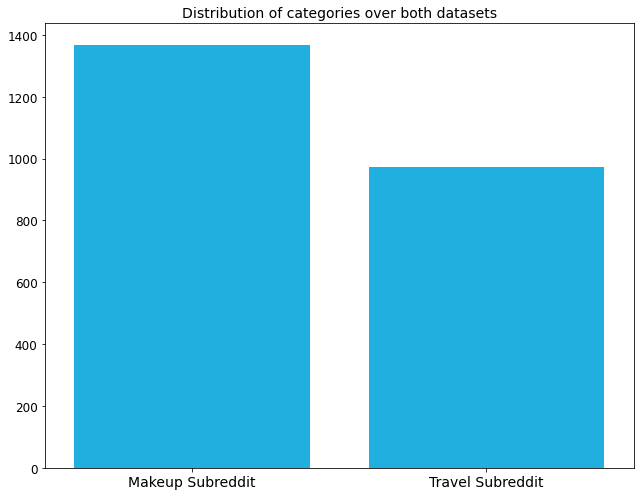

In [22]:
plt.figure(figsize = (9,7))
sns.barplot(y = [len(makeup_df), len(travel_df)], x = ['Makeup Subreddit','Travel Subreddit'] , color = 'deepskyblue')
plt.title('Distribution of categories over both datasets', fontsize=14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=12)
plt.tight_layout()

As we can see from the plot above, both categories are not very well balanced, since there is a small gap between both classes. <br>Now let's get a bit deeper and check the words distribution and dominance over both classes with the `selftext` column.
### 2. selftext analysis

In [23]:
def topwords_vis(df1 , df2):
    fit , ax = plt.subplots(1, 2, figsize = (15,10) , sharex = True, constrained_layout=True)
    
    df1.plot(kind = 'barh' , ax = ax[0], color = 'lightcoral')
    ax[0].set_title('Top Phrases in Makeup Subreddit' , fontsize = 14)
    ax[0].set_xlabel('count of words/phrases', fontsize=13);
    
    df2.plot(kind = 'barh' , ax = ax[1] , color = 'plum')
    ax[1].set_title('Top Phrases in Travel Subreddit' , fontsize = 14)
    ax[1].set_xlabel('count of words/phrases', fontsize=13);

In [24]:
# instantiate a basic vectoriser with only settings for extracting bi-grams and tri-grams
count_vec = CountVectorizer(stop_words = ENGLISH_STOP_WORDS, ngram_range=(2,3))

#fit/transform count vectoriser to title and get the 50 phrases with the highest count
makeup_vector = count_vec.fit_transform(makeup_df['selftext'])
makeup_vector = pd.DataFrame(makeup_vector.toarray(), columns = count_vec.get_feature_names())
m_selftext_50 = makeup_vector.sum().sort_values(ascending=False).head(50)

# fit/transform count vectoriser to title and get the 50 phrases with the highest count
travel_vector = count_vec.fit_transform(travel_df['selftext'])
travel_vector = pd.DataFrame(travel_vector.toarray(), columns = count_vec.get_feature_names())
t_selftext_50 = travel_vector.sum().sort_values(ascending=False).head(50)

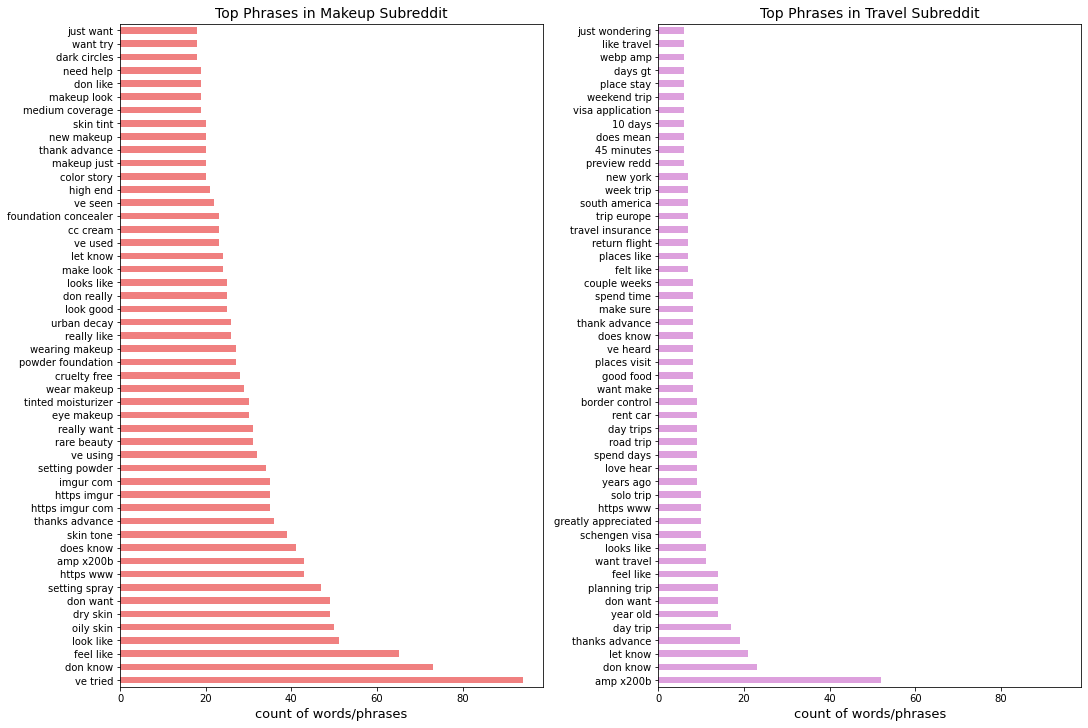

In [25]:
topwords_vis(m_selftext_50, t_selftext_50)

In [26]:
# combining title and selftect into a new column called text
makeup_df["full_text"] = makeup_df["title"] + makeup_df["selftext"]

Now that we have combined both text data into one column, we no longer need the other features since they won't be used for the classification task later, so that's why we gonna drop them

In [27]:
#drop the rows that are not needed anymore
makeup_df.drop(['title','created_utc','selftext'], axis =1, inplace = True)

In [28]:
#double checking the top 5 rows
makeup_df.sample(5)

,subreddit,full_text
1438,Makeup,Looking for beauty bloggers with hooded eyesI ...
936,Makeup,Eyeliner recommendations ;I'm looking for a bl...
841,Makeup,New signups spend $30 get $30 via paypal or ch...
1288,Makeup,$100 Amazon Gift Card&amp;#x200B;\n\nHow To Ad...
559,Makeup,What Kind of Base Does My Foundation Have?Ingr...


### 3. Wordcloud

In [29]:
# prepare a tokenizer
tokenizer = RegexpTokenizer(r"\w+[a-zA-Z]")
# prepare a lemmatizer
lemmatizer = WordNetLemmatizer()
# prepare a PorterStemmer
p_stemmer = PorterStemmer()
# prepare Stopwords
stopwords = stopwords.words('english')

In [30]:
# Tokenize and store
makeup_df["tokens"] = makeup_df["full_text"].apply(tokenizer.tokenize)

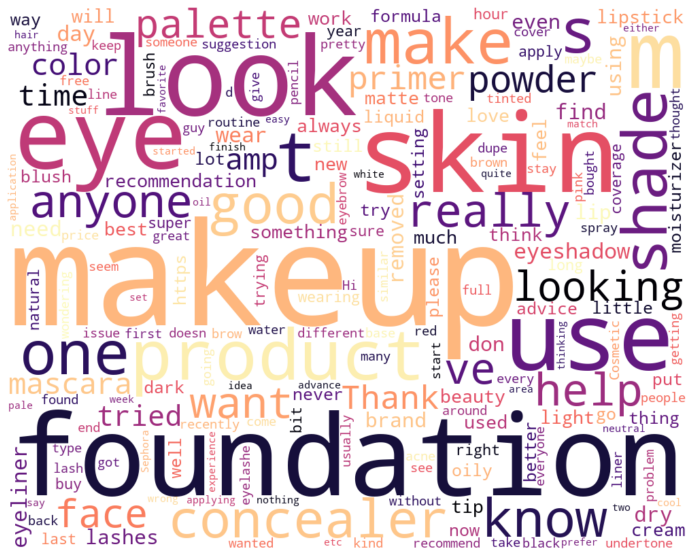

In [31]:
# wordcloud for the tokens using tokenizer
word_all = ' '.join([word for word in makeup_df['full_text']])
wordcloud = WordCloud(width= 1000, 
                      height= 800,
                      max_font_size = 210,
                      collocations = False,
                      background_color = 'white',
                      colormap= 'magma').generate(word_all)
plt.figure(figsize=(20,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [32]:
# Creating a Lemmatized column
lem_array = []
for i in makeup_df.index:
    lem_list = []
    for x in makeup_df["tokens"][i]:
        lem_list.append(lemmatizer.lemmatize(x).lower())
    lem_array.append(lem_list)

makeup_df['lem'] = lem_array

# Creating a Stemmatized column

stem_array = []
for c in makeup_df.index:
    stem_list = []
    for w in makeup_df["tokens"][c]:
        stem_list.append(p_stemmer.stem(w).lower())
    stem_array.append(stem_list)

makeup_df['stem'] = stem_array

In [33]:
# Comparing Stemmatized and Lemmatized Tokens

list(zip(makeup_df['stem'][0], makeup_df['lem'][0]))

[('learn', 'learning'),
 ('to', 'to'),
 ('do', 'do'),
 ('your', 'your'),
 ('eyeshadow', 'eyeshadow'),
 ('involv', 'involves'),
 ('so', 'so'),
 ('mani', 'many'),
 ('differ', 'different'),
 ('skill', 'skill'),
 ('but', 'but'),
 ('there', 'there'),
 ('are', 'are'),
 ('some', 'some'),
 ('thing', 'thing'),
 ('that', 'that'),
 ('are', 'are'),
 ('just', 'just'),
 ('difficult', 'difficult'),
 ('to', 'to'),
 ('do', 'do'),
 ('for', 'for'),
 ('me', 'me'),
 ('anyway', 'anyways'),
 ('what', 'what'),
 ('do', 'do'),
 ('you', 'you'),
 ('find', 'find'),
 ('most', 'most'),
 ('tricki', 'tricky'),
 ('to', 'to'),
 ('do', 'do'),
 ('when', 'when'),
 ('it', 'it'),
 ('come', 'come'),
 ('to', 'to'),
 ('appli', 'applying'),
 ('eyeshadow', 'eyeshadow'),
 ('ve', 've'),
 ('gotten', 'gotten'),
 ('better', 'better'),
 ('over', 'over'),
 ('the', 'the'),
 ('last', 'last'),
 ('few', 'few'),
 ('month', 'month'),
 ('with', 'with'),
 ('appli', 'applying'),
 ('eyeshadow', 'eyeshadow'),
 ('which', 'which'),
 ('sooo', 'sooo')

In [34]:
# Finding odd words out
comparison = set(makeup_df['stem'][0]) - set(makeup_df['lem'][0])
print(comparison)

{'tricki', 'techniqu', 'becaus', 'creas', 'appli', 'frustrat', 'learn', 'confid', 'happi', 'anyway', 'ani', 'creat', 'hood', 'differ', 'mani', 'wear', 'difficulti', 'involv', 'as', 'feel'}


In [35]:
# Drop Stemmed Columns as the word comes out weird
makeup_df.drop('stem', axis = 1, inplace = True)

In [36]:
# Creating a combined list of words through all elements
freq_count = []

for i in makeup_df['lem']:
    no_stop_words = [token for token in i if token not in stopwords]
    for x in no_stop_words:
        freq_count.append(x)

In [37]:
# Finding words with highest frequency
word_freq = FreqDist(freq_count)
print(word_freq.most_common(15))

[('makeup', 982), ('foundation', 715), ('skin', 681), ('look', 676), ('like', 625), ('eye', 514), ('use', 482), ('product', 480), ('make', 380), ('shade', 373), ('good', 363), ('one', 362), ('wa', 349), ('would', 338), ('know', 337)]


<AxesSubplot:>

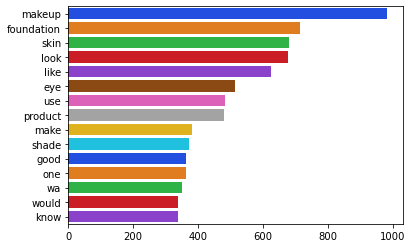

In [38]:
# Top 15 words
makeup_top_fifteen = word_freq.most_common(15)
words_makeup = [x[0] for x in makeup_top_fifteen]
count_makeup = [x[1] for x in makeup_top_fifteen]

sns.barplot(x=count_makeup, y=words_makeup, palette='bright')

In [ ]:
#Adding words into the stopword
new_words = ('wa','one',
             'removed','would','ha',
             'http','hello','hi','http','https')
for i in new_words:
    stopwords.append(i)

### 4. Word Frequency

In [39]:
# Creating a combined list of words through all elements
freqm_count = []

for i in makeup_df['lem']:
    no_stop_words = [token for token in i if token not in stopwords]
    for x in no_stop_words:
        freqm_count.append(x)

In [40]:
# Finding words with highest frequency
mword_freq = FreqDist(freq_count)
print(mword_freq.most_common(10))

[('makeup', 982), ('foundation', 715), ('skin', 681), ('look', 676), ('like', 625), ('eye', 514), ('use', 482), ('product', 480), ('make', 380), ('shade', 373)]


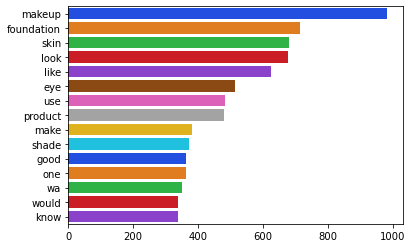

In [41]:
# Top 15 words
makeup_top_fifteen = mword_freq.most_common(15)
words_makeup= [x[0] for x in makeup_top_fifteen]
count_makeup= [x[1] for x in makeup_top_fifteen]

sns.barplot(x=count_makeup, y=words_makeup, palette='bright');

### Exploring Travel subreddit data

In [42]:
# checking a sample of the dataset
travel_df.sample(5)

,title,subreddit,created_utc,selftext
904,What is your 'bucket list' of places you want ...,travel,2022-04-22 07:56:10,I'm a 25 year old male and I did not really tr...
954,International Travel Advice,travel,2022-04-22 03:13:08,[removed]
1135,Working in the uk,travel,2022-04-21 10:32:35,[removed]
1290,Stuck on deciding Honeymoon destination - Ital...,travel,2022-04-21 01:04:09,[removed]
1062,Any Costa Rica useful tips?,travel,2022-04-21 18:02:57,I’m going to Costa Rica for 8 nights in May an...


In [43]:
#combining title and selftext into a new column called message
travel_df["full_text"] = travel_df["title"] + travel_df["selftext"]

In [44]:
# dropping columns that are not needed
travel_df.drop(['title','created_utc','selftext'], axis =1, inplace = True)

In [45]:
# Tokenize and store
travel_df["tokens"] = travel_df["full_text"].apply(tokenizer.tokenize)

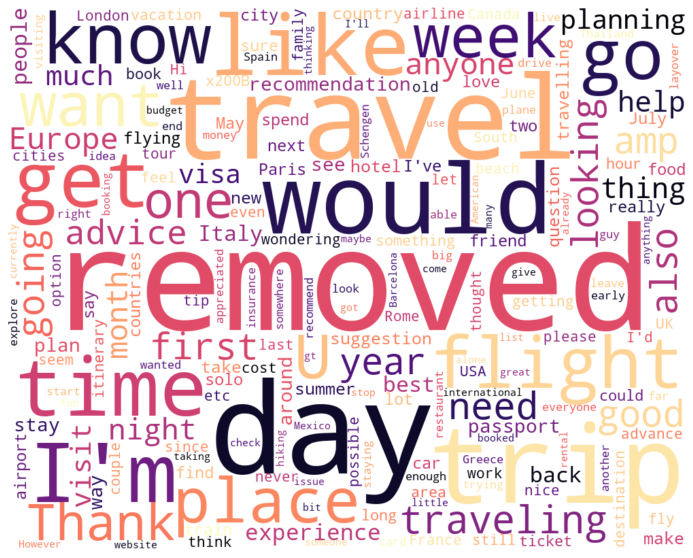

In [46]:
# create a wordcloud for message column
word_all = ' '.join([word for word in travel_df['full_text']])
wordcloud = WordCloud(width= 1000, 
                      height= 800,
                      max_font_size = 210,
                      collocations = False,
                      background_color = 'white', stopwords=stopwords,
                      colormap= 'magma').generate(word_all)
plt.figure(figsize=(20,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [47]:
# Creating a Lemmatized column
lem_array = []
for i in travel_df.index:
    lem_list = []
    for x in travel_df["tokens"][i]:
        lem_list.append(lemmatizer.lemmatize(x).lower())
    lem_array.append(lem_list)

travel_df['lem'] = lem_array

# Creating a Stemmatized column
stem_array = []
for c in travel_df.index:
    stem_list = []
    for w in travel_df["tokens"][c]:
        stem_list.append(p_stemmer.stem(w).lower())
    stem_array.append(stem_list)

travel_df['stem'] = stem_array

In [48]:
# Drop Stemmed Columns as the results do not make sense
travel_df.drop('stem', axis = 1, inplace = True)

### Word Freaquency for Travel subreddit

In [49]:
# Creating a combined list of words through all elements
freqf_count = []

for i in travel_df['lem']:
    no_stop_words = [token for token in i if token not in stopwords]
    for x in no_stop_words:
        freqf_count.append(x)

In [50]:
# Finding words with highest frequency
fword_freq = FreqDist(freqf_count)
print(fword_freq.most_common(10))

[('removed', 512), ('day', 395), ('travel', 330), ('trip', 315), ('would', 296), ('like', 218), ('wa', 205), ('time', 203), ('get', 185), ('go', 179)]


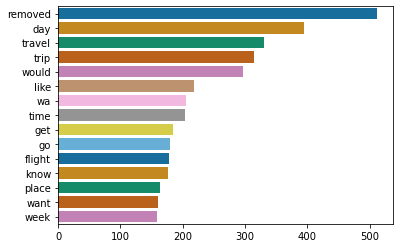

In [51]:
#Top 15 words
frag_top_fifteen = fword_freq.most_common(15)
words_frag= [x[0] for x in frag_top_fifteen]
count_frag= [x[1] for x in frag_top_fifteen]

sns.barplot(x =count_frag, y =words_frag, palette= 'colorblind');

### Comparing both Travel and Makeup Subreddit

In [52]:
# instantiate a basic vectoriser with only settings for extracting bi- and tri-grams
count_vect = CountVectorizer(stop_words = ENGLISH_STOP_WORDS, ngram_range=(2,3))

#fit/transform count vectoriser to title and get the 50 phrases with the highest count
vec_m1 = count_vect.fit_transform(makeup_df['full_text'])
vec_m1 = pd.DataFrame(vec_m1.toarray(), columns = count_vect.get_feature_names())
m_full_text_50 = vec_m1.sum().sort_values(ascending=False).head(50)

# fit/transform count vectoriser to title and get the 50 phrases with the highest count
vec_t1 = count_vect.fit_transform(travel_df['full_text'])
vec_t1 = pd.DataFrame(vec_t1.toarray(), columns = count_vect.get_feature_names())
t_full_text_50 = vec_t1.sum().sort_values(ascending=False).head(50)

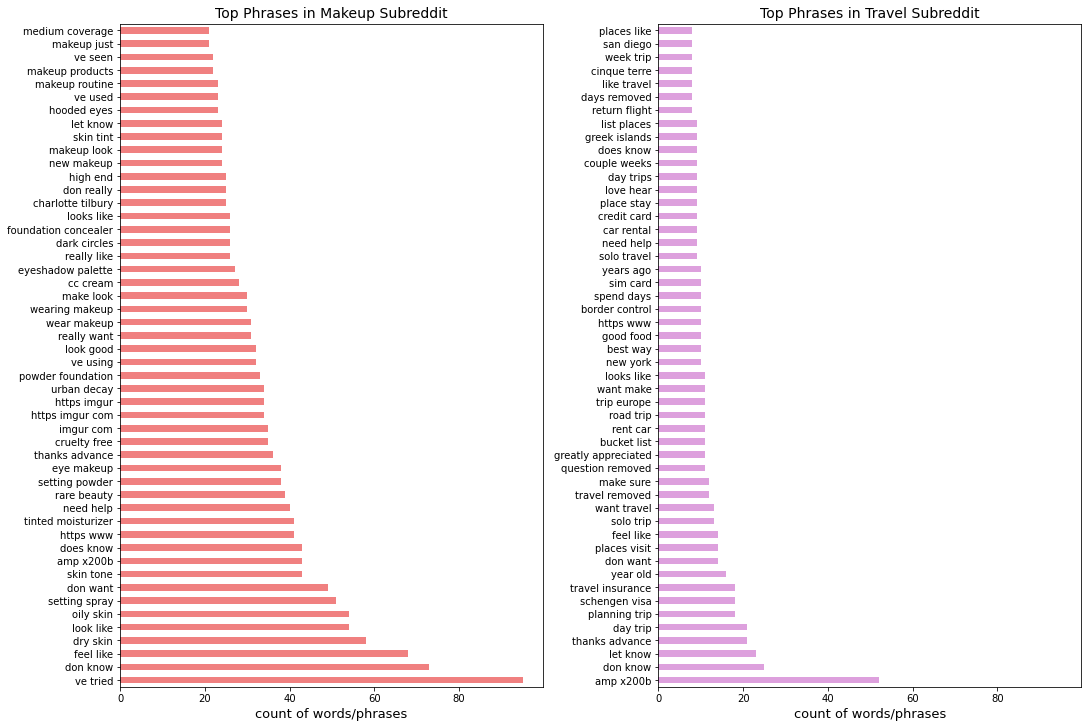

In [53]:
#use the topwords_vis function to create the visualisation for the combined message column
topwords_vis(m_full_text_50, t_full_text_50)

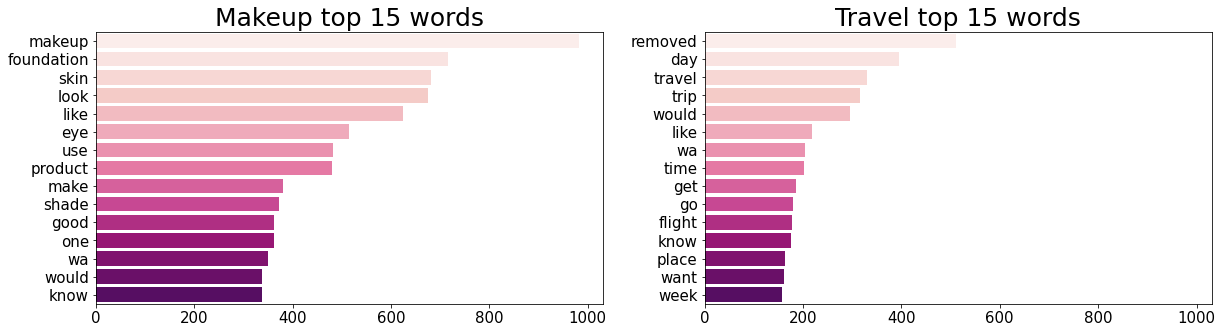

In [54]:
fig, axes = plt.subplots(1, 2, sharex=True, figsize=(20,5))

axes[0].set_title('Makeup top 15 words',fontsize = 25)
axes[0].tick_params(labelsize=15)
sns.barplot(ax=axes[0], x=count_makeup, y=words_makeup, palette= 'RdPu');

axes[1].set_title('Travel top 15 words',fontsize = 25)
axes[1].tick_params(labelsize=15)
sns.barplot(ax=axes[1], x=count_frag, y=words_frag, palette= 'RdPu');

The graph above shows the same results when we plot the wordcloud. However, there results are different when we plot for phrases for each subreddit

In [55]:
# total words
print(f' Makeup has a total of {len(mword_freq)} words')
print(f' Travel has a total of {len(fword_freq)} words')

 Makeup has a total of 6742 words
 Travel has a total of 5021 words


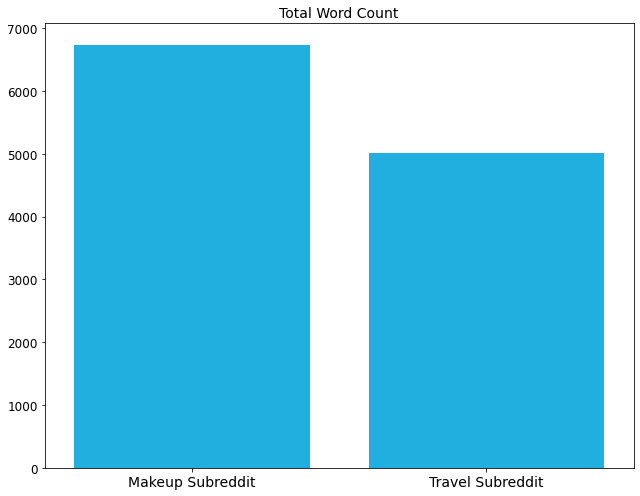

In [56]:
# visualisation for total words
plt.figure(figsize = (9, 7))
sns.barplot(y = [(len(mword_freq)), (len(fword_freq))], 
            x = ['Makeup Subreddit','Travel Subreddit'] , color = 'deepskyblue')
plt.title('Total Word Count', fontsize=14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=12)
plt.tight_layout()

In [57]:
# unique words makeup reddit
makeup =[]
count_m = 0

for i in mword_freq:
    if i not in makeup:
        count_m +=1
        makeup.append(i)

In [58]:
# unique words fragrance reddit
frag =[]
count_f = 0

for i in fword_freq:
    if i not in frag:
        count_f +=1
        frag.append(i)

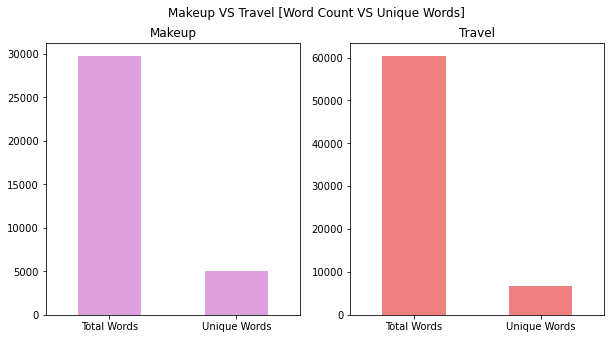

In [59]:
# compare the unique words in both subreddits
fig, axes = plt.subplots(1, 2, sharex=True, figsize=(10,5))
fig.suptitle('Makeup VS Travel [Word Count VS Unique Words]')

axes[0].set_title('Makeup')
pd.Series([len(freqm_count),len(makeup)], index=['Total Words','Unique Words']).plot(ax=axes[1],rot=0,kind="bar",color = 'lightcoral')

axes[1].set_title('Travel')
pd.Series([len(freqf_count),len(frag)], index=['Total Words','Unique Words']).plot(ax=axes[0],rot=0,kind="bar",color = 'plum');

As we can see from the histograms above, the class of `Travel` has a slightly higher unique words, than the `Makeup` class

In [60]:
def Intersection(makeup, frag):
    return set(makeup).intersection(frag)

print(len(Intersection(freqm_count, freqf_count)))

2136


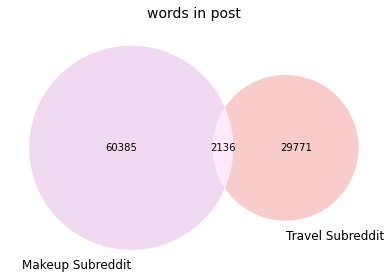

In [61]:
# Finding Common words
venn2(subsets = (len(freqm_count),len(freqf_count),len(Intersection(freqm_count, freqf_count))), 
      set_labels = ('Makeup Subreddit', 'Travel Subreddit'),set_colors = ('plum','lightcoral'))
plt.title('words in post', fontsize=14)
plt.tight_layout()

There are 2171 words that are common in both Makeup and Travel subreddit

## Preparing the datasets for modeling

In [62]:
#Joining words back for each row in lem column
for i in travel_df['lem'].index:
    travel_df['lem'][i] = ' '.join(travel_df['lem'][i])

for i in makeup_df['lem'].index:
    makeup_df['lem'][i] = ' '.join(makeup_df['lem'][i])

In [63]:
travel_df.sample(5)

,subreddit,full_text,tokens,lem
618,travel,KLM Baggage Handlers StrikeI’m sitting on a pl...,"[KLM, Baggage, Handlers, StrikeI, sitting, on,...",klm baggage handlers strikei sitting on plane ...
192,travel,"Europe for two weeks, advice needed[removed]","[Europe, for, two, weeks, advice, needed, remo...",europe for two week advice needed removed
17,travel,Is there a cheap or cost friendly Caribbean I ...,"[Is, there, cheap, or, cost, friendly, Caribbe...",is there cheap or cost friendly caribbean can ...
1456,travel,Moved to Australia not happy after 7 monthsI m...,"[Moved, to, Australia, not, happy, after, mont...",moved to australia not happy after monthsi mov...
259,travel,Is Groupon cheapest option for doing all inclu...,"[Is, Groupon, cheapest, option, for, doing, al...",is groupon cheapest option for doing all inclu...


In [64]:
makeup_df.sample(5)

,subreddit,full_text,tokens,lem
1415,Makeup,What sort of skin prep is necessary before app...,"[What, sort, of, skin, prep, is, necessary, be...",what sort of skin prep is necessary before app...
27,Makeup,Finding a productHi everyone! Not sure if this...,"[Finding, productHi, everyone, Not, sure, if, ...",finding producthi everyone not sure if this is...
1273,Makeup,Replacement Foundation Pump AdviceHi everyone-...,"[Replacement, Foundation, Pump, AdviceHi, ever...",replacement foundation pump advicehi everyone ...
1165,Makeup,Why doesn’t my makeup last all day?I’m using g...,"[Why, doesn, my, makeup, last, all, day, using...",why doesn my makeup last all day using good br...
1496,Makeup,Water based moisturizer and silicone primer?I ...,"[Water, based, moisturizer, and, silicone, pri...",water based moisturizer and silicone primer ha...


## Save the processed data

In [65]:
#Convert to CSV
makeup_df.to_csv('clean_makeup.csv', index = False)
#Convert to CSV
travel_df.to_csv('clean_travel.csv', index = False)